# Logistic Regression vs k-Nearest Neighbors

The goal of this project is to compare two algorithms: **k-Nearest Neighbors** and **Logistic Regression**, on a dataset of 1400 samples, each described by 30 numerical features and belonging to some class. We aim not only to measure and contrast their raw performance, but also to tune their hyperparameters to achieve the best possible results in the most efficient way.  

To accomplish this, we proceed through the following steps:

1. *Data Loading & Initial Inspection* (EDA)
2. *Correlation Analysis* 
3. *Feature Distributions & Scaling* 
4. *Train/Test Split* 
5. *Baseline Models*:
   - **Logistic Regression** 
   - **k-Nearest Neighbors**
6. *Hyperparameter Tuning* 
7. *Hyperparameter Visualization*
8. *Final Model Selection & Evaluation*  
9. *Conclusions*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import set_config
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier



###  Data Loading & Initial Inspection

We load the dataset from CSV, specifying the **first column** as the index since it identifies each sample.  
- We expect **1,400 rows** and **31 columns**:  
  1. **ID**  
  2. **Label** (5 classes)  
  3. **30 numeric features**  

After loading, we immediately:  
- **Print the DataFrame shape** to confirm dimensions.  
- **View the first few rows** to check that the “label” column is in the correct position and that feature values look reasonable.

In [2]:
train_data = pd.read_csv("mldata_0003198640.csv", index_col=0)
train_data.shape


(1400, 31)

In [3]:
train_data.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,4,0.555362,0.008339,3.373726,-1.373990,0.774847,-0.003741,0.816504,0.432504,2.222847,...,-1.928484,1.136086,0.250088,-0.998001,-3.820000,2.366849,3.601835,1.795359,8.241580,0.048556
1,3,4.835799,-0.928189,1.363160,-3.128872,0.614714,-3.296865,3.126443,2.518322,2.713584,...,3.891208,-0.390891,-4.025952,-0.179685,-4.831259,0.872603,-2.310141,0.142509,-1.755569,2.512728
2,2,-0.614813,2.150355,2.787940,-1.336707,-0.452505,-0.652043,-0.254879,1.203343,2.182129,...,4.630745,-0.389118,1.104567,1.114603,-0.198871,-2.107245,4.610441,4.015458,-2.776786,-7.172412
3,4,1.527510,-2.341290,2.010460,-0.883687,-0.007226,-0.142413,-4.725455,-4.167760,-2.013765,...,1.540044,0.803038,-1.505014,-0.937113,0.406371,0.799130,0.646240,2.729080,8.959885,4.434750
4,4,2.506607,-0.381475,2.745136,-0.335162,-0.725949,1.697702,2.675223,0.495246,0.719564,...,-1.644105,2.465431,-1.519455,0.232933,-0.102290,0.761317,4.199455,-1.345608,5.633699,-3.123869


###  Missing-Value Check

An important check is to ensure **no missing values** remain:  
- If any `NaN` are found, we would need an imputation strategy 

In [4]:
print(train_data.isnull().sum()) #check for missing values


label         0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64


Here, the dataset is complete, so we confirm zero `NaN` per column and move on.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1399
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1400 non-null   int64  
 1   feature_1   1400 non-null   float64
 2   feature_2   1400 non-null   float64
 3   feature_3   1400 non-null   float64
 4   feature_4   1400 non-null   float64
 5   feature_5   1400 non-null   float64
 6   feature_6   1400 non-null   float64
 7   feature_7   1400 non-null   float64
 8   feature_8   1400 non-null   float64
 9   feature_9   1400 non-null   float64
 10  feature_10  1400 non-null   float64
 11  feature_11  1400 non-null   float64
 12  feature_12  1400 non-null   float64
 13  feature_13  1400 non-null   float64
 14  feature_14  1400 non-null   float64
 15  feature_15  1400 non-null   float64
 16  feature_16  1400 non-null   float64
 17  feature_17  1400 non-null   float64
 18  feature_18  1400 non-null   float64
 19  feature_19  1400 non-null   floa

### Target Variable Summary

It’s always useful to get a quick statistical overview of the **target** columns, by running the describe function:

In [6]:
train_data.iloc[:, 1:].describe()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.301244,-0.011227,0.815298,-0.302911,0.092144,-0.358079,0.056925,-0.159674,0.199010,0.134529,...,-0.061916,0.090886,-0.018252,0.150560,-0.015957,0.119985,0.656471,1.001680,1.321871,-0.998869
std,2.688237,2.901502,2.895750,2.872902,0.983523,2.910645,2.842414,2.821231,2.987943,1.007133,...,2.900272,1.003209,2.591584,2.885843,2.794705,1.001387,2.753569,2.759268,6.371115,6.704749
min,-9.644708,-9.672680,-11.199516,-10.448733,-3.114715,-9.638675,-8.367888,-9.446510,-11.580218,-3.516005,...,-9.152681,-3.225162,-11.610324,-8.416623,-10.300909,-3.470371,-7.882084,-8.536712,-21.372498,-26.960370
25%,-1.498497,-2.025785,-1.023363,-2.236885,-0.599318,-2.319934,-1.906184,-2.051072,-1.741767,-0.547792,...,-1.978373,-0.591188,-1.824146,-1.809738,-1.925333,-0.532689,-1.182554,-0.723436,-2.783347,-5.825494
50%,0.374742,-0.009250,0.911352,-0.310823,0.107776,-0.241571,0.027260,-0.253457,0.285463,0.146100,...,-0.081650,0.086840,0.020933,0.160295,-0.051474,0.100046,0.645990,1.012726,1.391599,-1.079029
75%,2.074214,2.038295,2.815269,1.559310,0.779630,1.695882,2.039020,1.808663,2.212078,0.849989,...,1.882710,0.799192,1.771992,2.029612,1.906301,0.796003,2.540587,2.760495,5.421084,3.480977
max,7.802419,10.949171,9.930643,8.570940,3.039756,9.019849,8.958401,8.280659,9.041383,2.907200,...,8.883330,3.386172,8.693502,11.189808,8.507502,3.516425,10.657340,10.165341,31.042362,23.081674


###  Correlation Analysis

Before modeling, we compute the **pairwise correlation** among all 30 numeric features to:  
1. **Detect multicollinearity**, since high correlations may indicate redundant features and led to overfitting 
2. Decide if dimensionality reduction (PCA, feature elimination) is needed to reduce noise or collinearity.  

In a first moment we check if there is a perfect correlation among some features (no correlation found). 
We then visualize a heatmap with  **no numeric annotations** to keep it clean. 

In [7]:
correlation_matrix = train_data.iloc[:,1:].corr()
perfect_corr = (np.triu(correlation_matrix, k=1) == 1.0)

duplicates = np.column_stack(np.where(perfect_corr))

for i, j in duplicates:
    col_i = correlation_matrix.columns[i]
    col_j = correlation_matrix.columns[j]
    print(f"Columns '{col_i}' and '{col_j}' are perfectly correlated (corr = 1.0)")

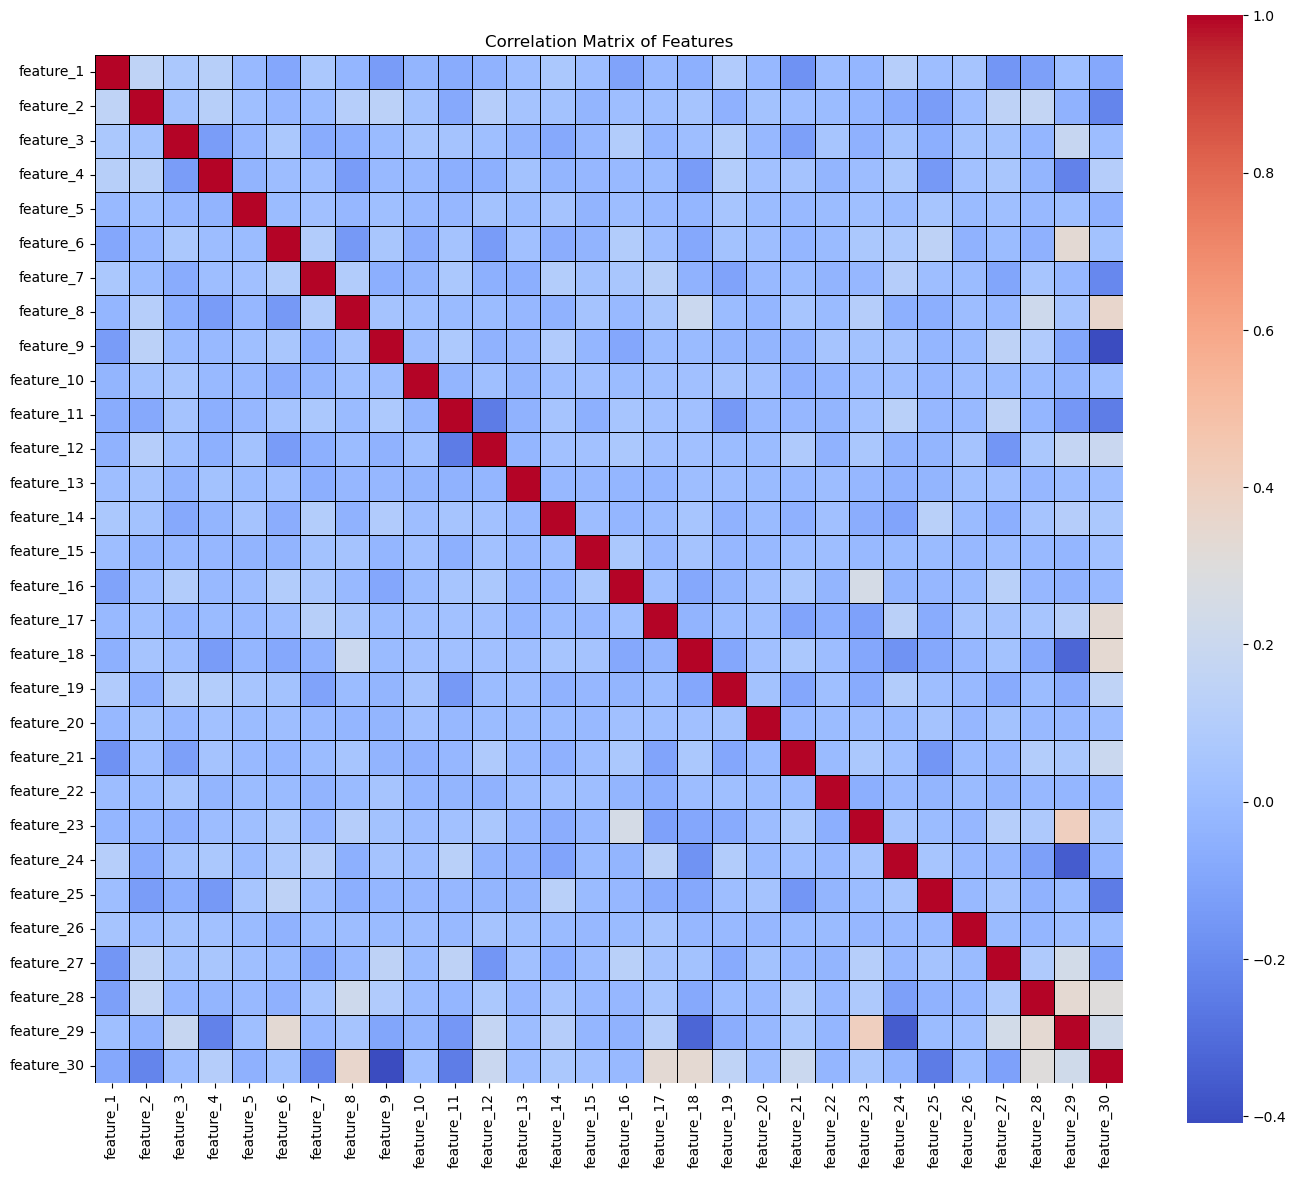

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,       
    linewidths=0.5,       
    linecolor='black',  
    square=True,        
)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

###  Target Distribution & Class Imbalance

Next, we examine the **label frequency** to quantify class imbalance and we plot a **bar chart** of counts and percentages for each of the 5 classes.

In [9]:
train_data["label"].value_counts() 

label
0    406
4    354
3    284
2    273
1     83
Name: count, dtype: int64

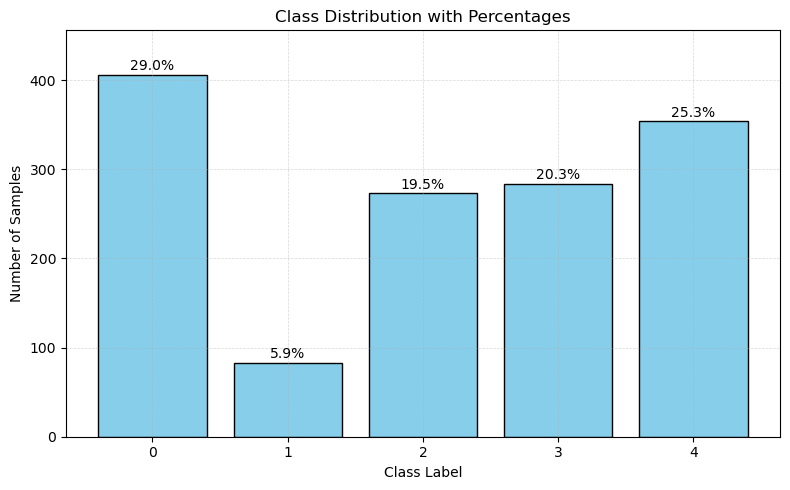

In [10]:
label_counts = pd.Series({0: 406, 4: 354, 3: 284, 2: 273, 1: 83})
label_counts = label_counts.sort_index() 

total = label_counts.sum()
label_percent = (label_counts / total * 100).round(1)

plt.figure(figsize=(8, 5))
bars = plt.bar(label_counts.index.astype(str), label_counts.values, color='skyblue', edgecolor='black')

for bar, pct in zip(bars, label_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f"{pct}%", ha='center', fontsize=10)

plt.title("Class Distribution with Percentages")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.ylim(0, label_counts.max() + 50)
plt.tight_layout()
plt.show()


Note that the *label 1* has <10% of samples: the classes are unbalanced and this will drive us to use **stratified sampling** and **class-weighted metrics** later.

###  Feature Distributions & Scaling

We plot **histograms** of each feature **before and after** scaling to illustrate why normalization is necessary:  
- Raw features may span vastly different ranges, which can distort distance-based algorithms (KNN) and regularized models (Logistic Regression).  
- We will standardize using `StandardScaler` within a pipeline to prevent **data leakage** 


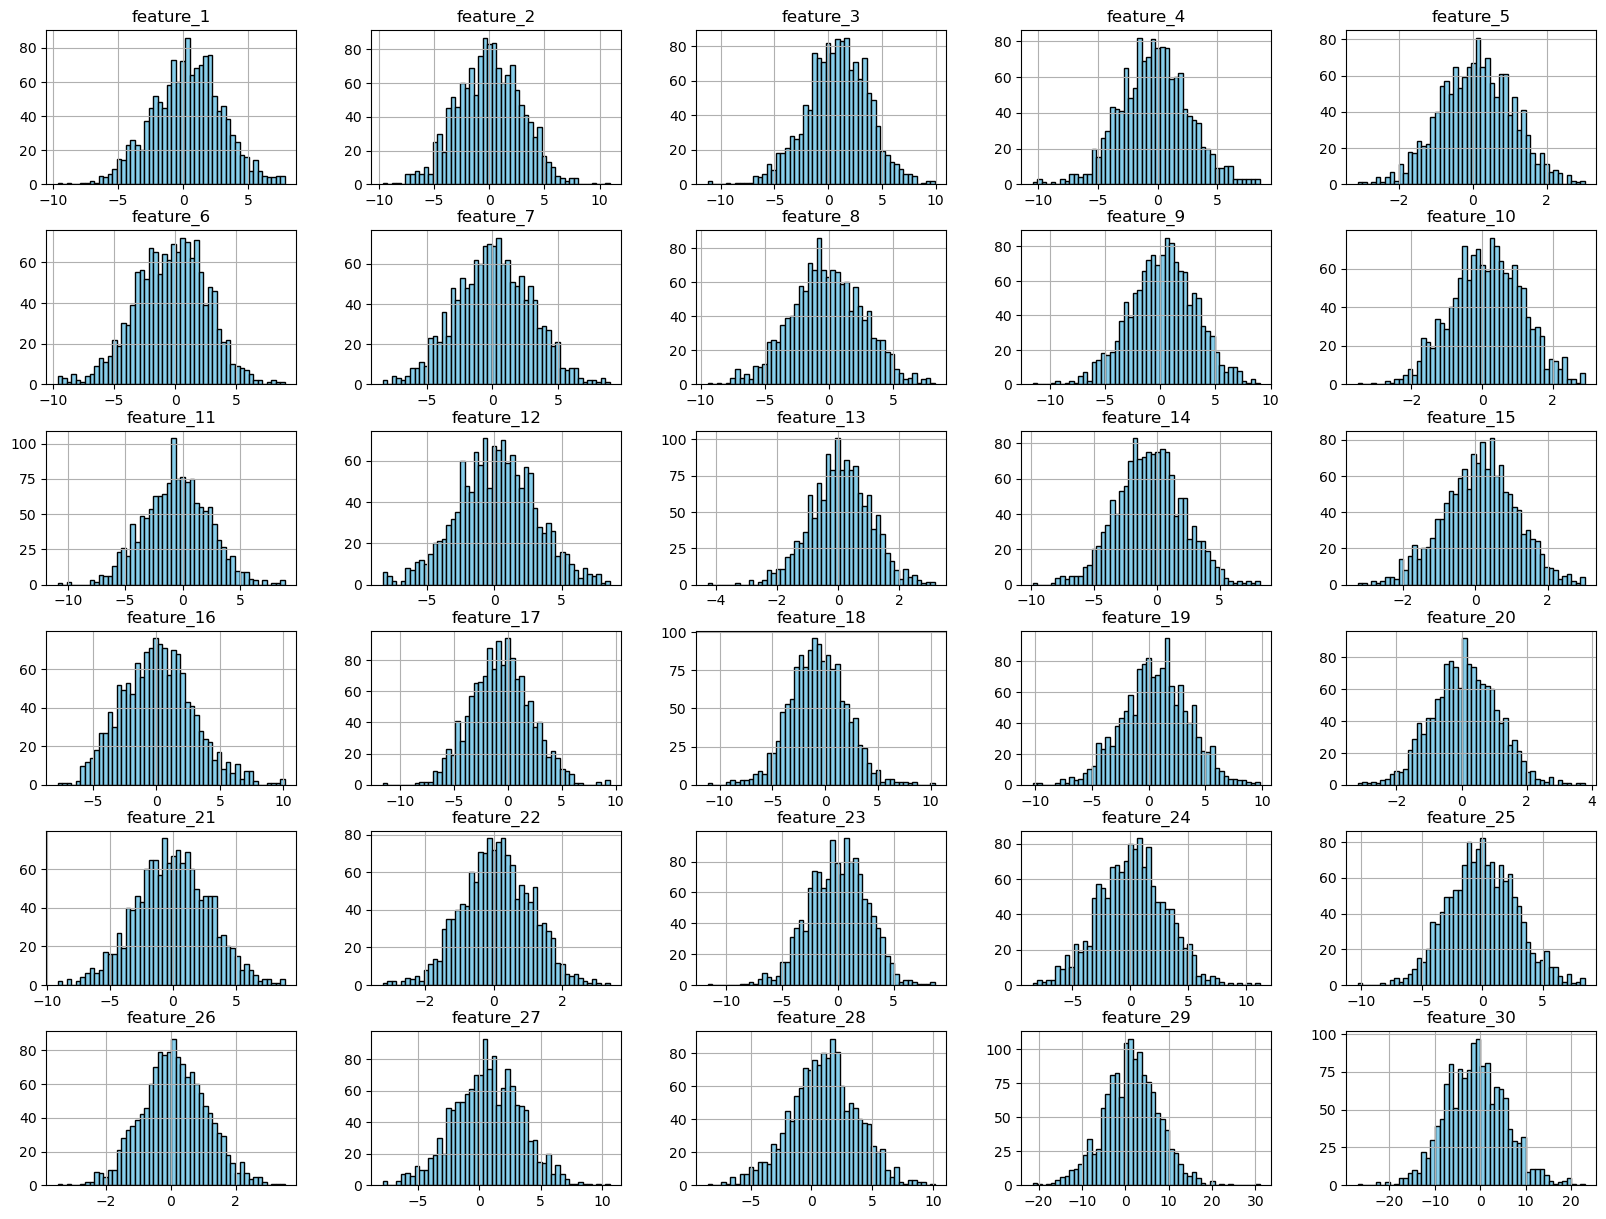

In [11]:
train_data.iloc[:,1:].hist(bins=50, figsize=(20, 15), color="skyblue", edgecolor='black', grid=True);

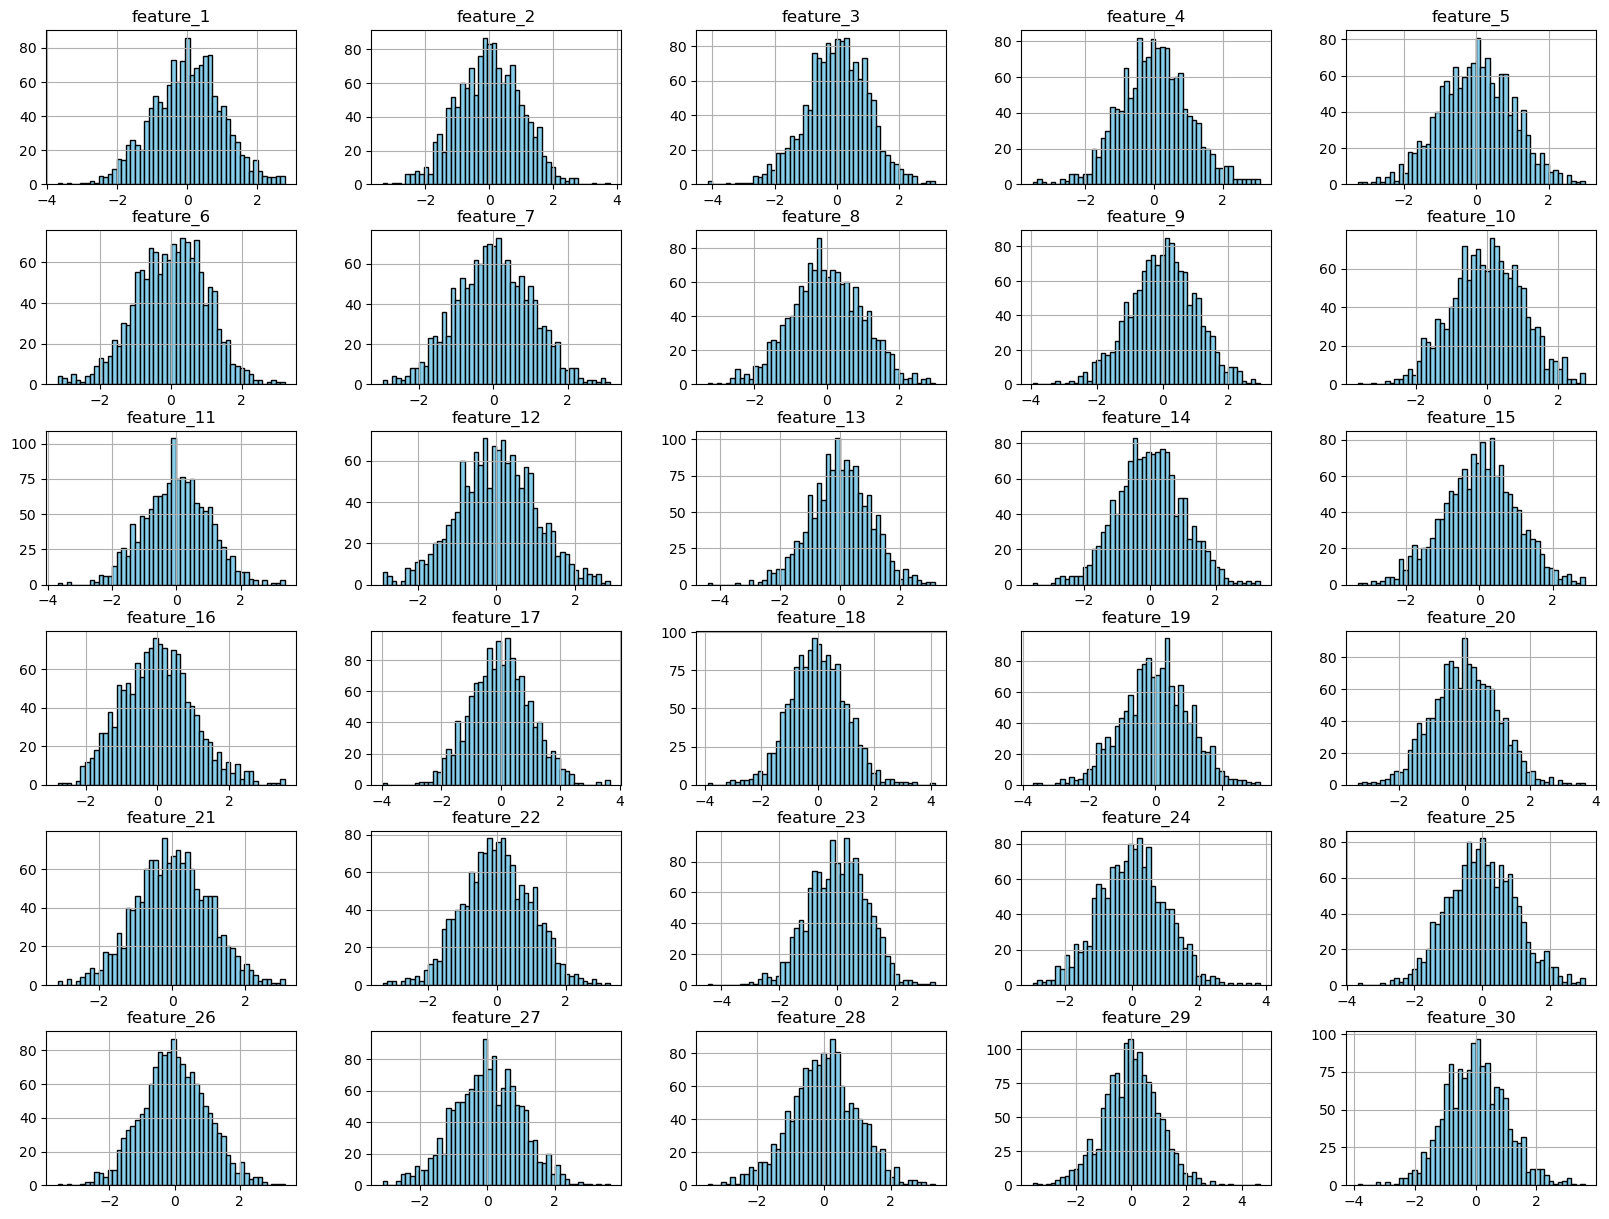

In [12]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]

preprocess_pipeline = Pipeline([
    ("scaler", StandardScaler()),
])

X_train_processed = preprocess_pipeline.fit_transform(X_train)
normalized_data = pd.DataFrame(X_train_processed, columns=X_train.columns)

normalized_data.hist(bins=50, figsize=(20, 15), color="skyblue", edgecolor='black', grid=True);

###  Train/Test Split with Stratification

To create our final evaluation set, we split the data **80/20**, ensuring that the class proportions are preserved and the split is reproducible (random state =42).
Using stratification prevents accidentally removing too many samples from minority classes in either the training or testing set.


In [13]:
X = train_data.drop(columns='label')  
y = train_data['label']               
X_train, X_test_2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv =StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## Logistic Regression

### Baseline Model 

We first set up a **baseline** pipeline for Logistic Regression without any hyperparameter tuning.
We then perform a **10-fold stratified CV** on the **training set** to measure **accuracy**, giving us an idea of the performance.  

In [14]:
log_reg = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=10000))

reg_scores = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring='accuracy')

print("accuracy per fold:", reg_scores)
print("mean:", reg_scores.mean())
print("standard deviation:", reg_scores.std())

accuracy per fold: [0.57142857 0.52678571 0.58035714 0.44642857 0.67857143 0.54464286
 0.52678571 0.65178571 0.58928571 0.65178571]
mean: 0.5767857142857143
standard deviation: 0.06695833306875955


We also fit the baseline model on the training set and evaluate on the hold-out test set for a direct comparison later.

In [15]:
log_reg = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=10000))
log_reg.fit(X_train, y_train)
log_reg.score(X_test_2, y_test)

0.55

In [16]:
set_config(display='diagram')  

log_reg  

Pipeline(steps=[('pipeline', Pipeline(steps=[('scaler', StandardScaler())])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

### Baseline Logistic Regression: Detailed Classification Report

After fitting the un‐tuned Logistic Regression on the training set and predicting on the hold-out test set, we want to obtain a more detailed report.

In [17]:
y_pred = log_reg.predict(X_test_2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64        93
           1       0.56      0.50      0.53        20
           2       0.45      0.48      0.47        50
           3       0.53      0.61      0.57        51
           4       0.51      0.45      0.48        66

    accuracy                           0.55       280
   macro avg       0.54      0.54      0.54       280
weighted avg       0.55      0.55      0.55       280




**Key observations:**

1. **Overall accuracy of 55%** is in line with the cross validation, indicating limited predictive power without tuning.

2. **Minority classes suffer**:  
   - Class 1 has recall 0.50 and F1 0.53.  
   - Class 4 and class 2 also fall below 0.50 F1.  
This underlines the impact of class imbalance.

3. **Macro vs weighted average**:  
   - The **macro average F1 = 0.54** treats all classes equally, highlighting poor performance on underrepresented labels.  
   - The **weighted average F1 = 0.55** is slightly higher, boosted by the majority class (class 0).

4. **Best recall on class 3 (0.61)** suggests the decision boundary favors some feature patterns more than others.

>  **Takeaway:** The untuned Logistic Regression baseline struggles with minority classes and achieves only moderate overall performance. This motivates both hyperparameter tuning and potentially incorporating class‐imbalance strategies before comparing to k-NN.


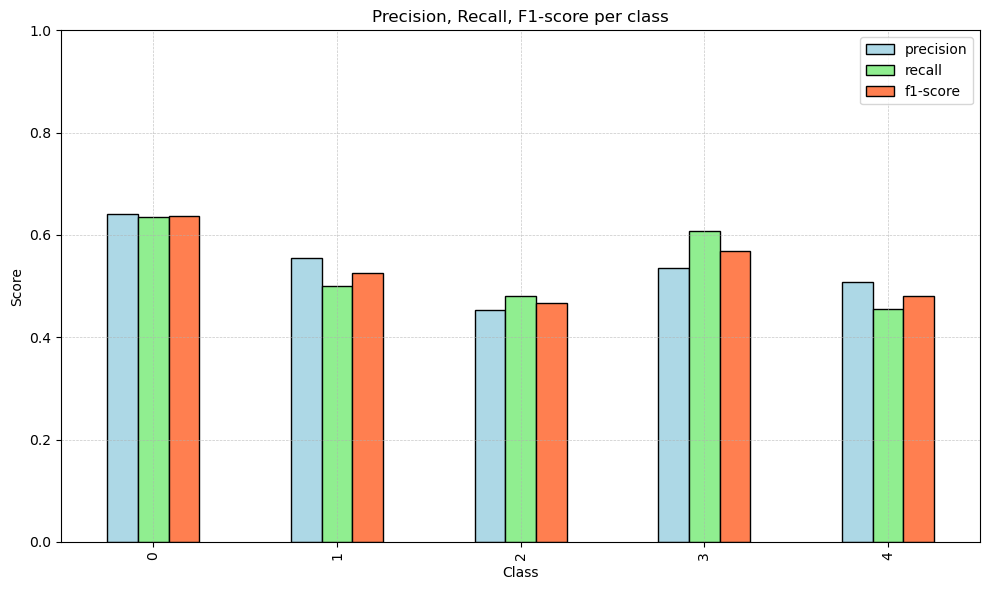

In [18]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T  
class_metrics = report_df.loc[[str(i) for i in sorted(y_test.unique())], ['precision', 'recall', 'f1-score']]

custom_colors = ['Lightblue', 'Lightgreen', 'Coral']  

class_metrics.plot(kind='bar', figsize=(10, 6), color=custom_colors, edgecolor='black')

plt.title("Precision, Recall, F1-score per class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


We now have a look at the confusion matrices. 

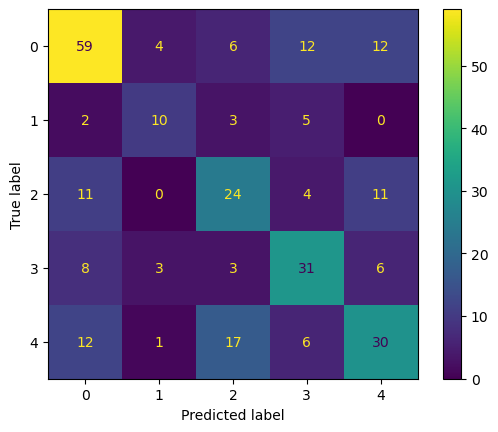

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

**Implications:**
- Minority classes 1 and 4 suffer from poor recall, confirming the need for imbalance handling 
- Classes 0, 2, and 4 show mutual confusion, indicating these feature distributions overlap
- Overall, the model struggles most with the rarest and borderline classes

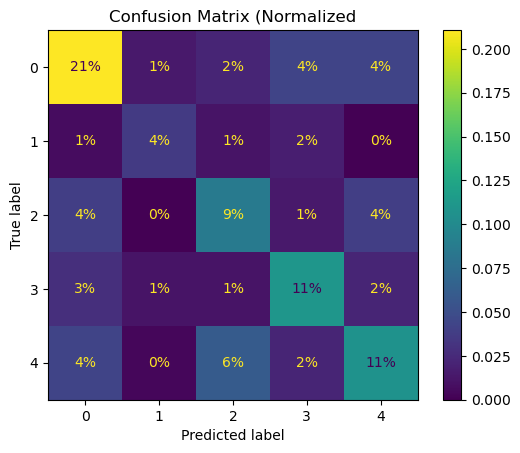

In [20]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize='all',
    values_format='.0%',
)
plt.title("Confusion Matrix (Normalized")
plt.show()

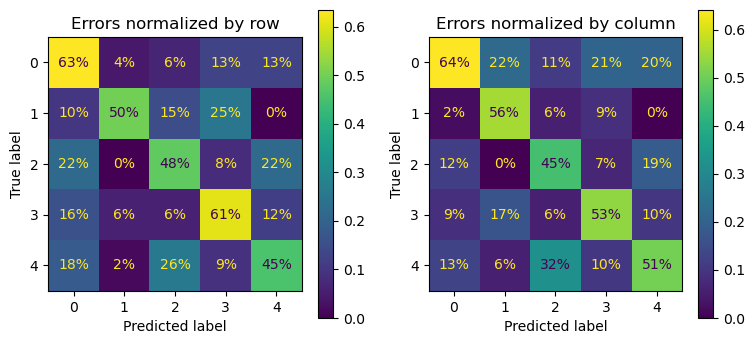

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0],normalize = "true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[1], normalize = "pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

###  Hyperparameter Tuning Strategy

To ensure our models generalize well, especially given the class imbalance, we perform all hyperparameter tuning **only on the training set** using a **stratified 10-fold cross-validation**. As our primary criterion we choose the **weighted F1 score**, because:

- **Balances precision and recall** in one number, so we don’t over-optimize for only false positives or only false negatives.  
- The **“weighted”** variant weights each class’s F1 by its number of samples, so **minority classes still influence** the final score without being completely swamped by the majority class.  
- Optimizing for weighted F1 discourages trivial high-accuracy solutions that simply predict the majority class.

- **Hyperparameter grid**  
  - Regularization strength `C`: `[0.01, 0.1, 1, 10, 100]`  
  - Penalty: L2 (Ridge)  

- **Scoring**  
  - We track these four metrics in CV:  
    - `accuracy`  
    - `precision_weighted`  
    - `recall_weighted`  
    - `f1_weighted`  
  - We set `refit='f1_weighted'` so that, after evaluating all metrics, **GridSearchCV** retrains the final model on the full training set using the hyperparameters that maximize **weighted F1**.

This approach ensures we find the value of `C` that best trades off bias vs variance **while maintaining balanced performance across all classes**.  


In [22]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2']
}

scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall_weighted': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0)
}

grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring=scoring, refit='f1_weighted')
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_
index = grid_search.best_index_

params = grid_search.best_params_
print("Best parameters:", params)
true_params = {k.split('__')[1]: v for k, v in params.items()}  

best_log_model = LogisticRegression(**true_params, max_iter=10000)
best_log = make_pipeline(preprocess_pipeline, best_log_model)
best_log.fit(X_train, y_train)
y_pred = best_log.predict(X_test_2)
print(classification_report(y_test, y_pred))


Best parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        93
           1       0.53      0.50      0.51        20
           2       0.45      0.48      0.47        50
           3       0.53      0.61      0.57        51
           4       0.51      0.45      0.48        66

    accuracy                           0.55       280
   macro avg       0.53      0.54      0.53       280
weighted avg       0.55      0.55      0.55       280



**Key takeaways**  
- **Accuracy = 0.55** and **weighted F1 = 0.55**, closely matching cross-validation, indicate no over-fitting.  
- **Minority classes (1 & 4)** still have low recall (<50%), showing difficulty in distinguishing rare labels even after tuning.  


We analyze how the cross validation performs during the Grid Search:

In [23]:
best_idx = grid_search.best_index_

n_folds = cv.get_n_splits()

fold_acc = np.array([
    results[f'split{i}_test_accuracy'][best_idx]
    for i in range(n_folds)
])

print("best_log accuracy per fold:", fold_acc)
print("best_log mean accuracy:", fold_acc.mean())
print("best_log standard deviation:", fold_acc.std())

best_log accuracy per fold: [0.57142857 0.52678571 0.58035714 0.44642857 0.67857143 0.54464286
 0.53571429 0.65178571 0.58928571 0.64285714]
best_log mean accuracy: 0.5767857142857143
best_log standard deviation: 0.06539226222714485


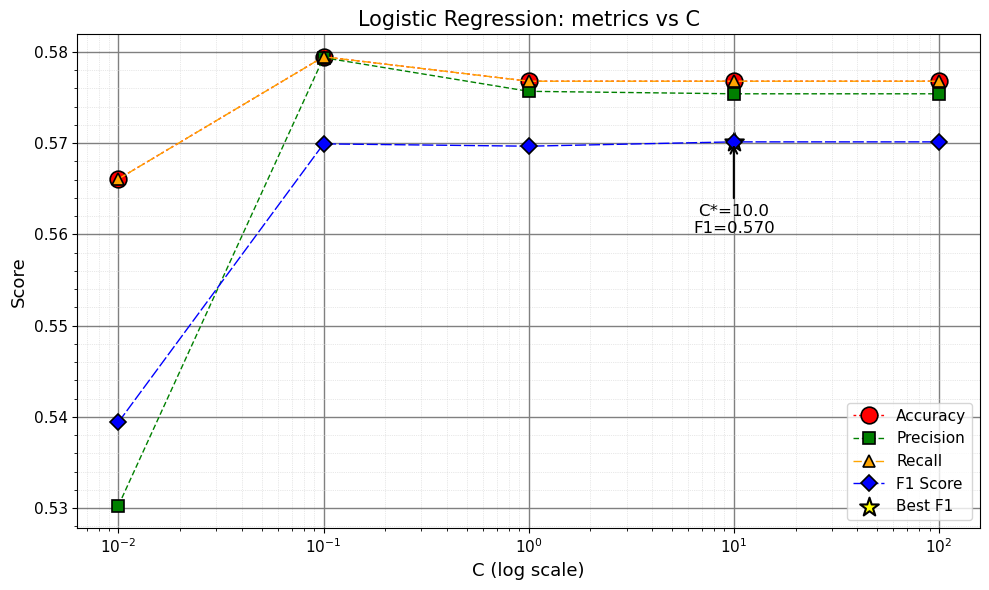

In [24]:
df_lr = pd.DataFrame(results)  
Cs = df_lr['param_logisticregression__C'].astype(float)


metrics = {
    'Accuracy':  'mean_test_accuracy',
    'Precision': 'mean_test_precision_weighted',
    'Recall':    'mean_test_recall_weighted',
    'F1 Score':  'mean_test_f1_weighted'
}


markers = {
    'Accuracy':  'o',
    'Precision': 's',
    'Recall':    '^',
    'F1 Score':  'D'
}
colors = {
    'Accuracy':  'red',
    'Precision': 'green',
    'Recall':    'orange',
    'F1 Score':  'blue'
}
dash_patterns = {
    'Accuracy':  (2, 2),
    'Precision': (4, 2),
    'Recall':    (6, 2),
    'F1 Score':  (8, 2)
}
sizes = {
    'Accuracy':  120,
    'Precision': 80,
    'Recall':    80,
    'F1 Score':  80
}

plt.figure(figsize=(10,6))
for label, col in metrics.items():
    plt.plot(
        Cs,
        df_lr[col],
        marker=markers[label],
        linestyle='--',
        linewidth=1,
        markersize=sizes[label]/10,
        dashes=dash_patterns[label],
        label=label,
        color=colors[label],
        markeredgecolor='black',
        markeredgewidth=1.2
    )


best_idx = grid_search.best_index_
best_C   = df_lr.loc[best_idx, 'param_logisticregression__C']
best_f1  = df_lr.loc[best_idx, 'mean_test_f1_weighted']
plt.scatter(
    best_C, best_f1,
    s=200,
    marker='*',
    c='yellow',
    edgecolors='black',
    linewidths=1.5,
    label='Best F1'
)
plt.annotate(
    f'C*={best_C}\nF1={best_f1:.3f}',
    xy=(best_C, best_f1),
    xytext=(best_C, best_f1 -0.01),
    ha='center',
    fontsize=12,
    arrowprops=dict(arrowstyle='->', lw=1.5)
)


plt.xscale('log')
plt.xticks(Cs, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('C (log scale)', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('Logistic Regression: metrics vs C', fontsize=15)
plt.grid(which='major', linestyle='-',  linewidth=1.0, color='gray')
plt.grid(which='minor', linestyle=':',  linewidth=0.5, color='lightgray')
plt.minorticks_on()
plt.tight_layout()
plt.legend(fontsize=11, loc='best')
plt.show()


### Logistic Regression: Metrics vs Regularization Strength (C)

This plot shows how four key evaluation metrics (**accuracy**, **precision (weighted)**, **recall (weighted)**, and **F1 score (weighted)**) vary as we adjust the inverse regularization parameter **C** on a logarithmic scale:

#### Key Takeaways
1. **Rapid improvement** from C = 0.01 to C = 0.1 across all metrics, indicating that very strong regularization (small C) underfits the data.  
2. **Plateau beyond C = 0.1**: metrics stabilize around 0.57–0.58, so increasing C further yields diminishing returns.  
3. **Optimal point (C = 10)**: although C = 1 and C = 100 give nearly identical performance, C = 10 achieves the **highest true weighted F1**, which justifies its selection.  
4. **Consistency across metrics**: since all four curves lie close together, choosing C based on F1 also preserves high accuracy, precision, and recall.

> **Conclusion:** We select **C = 10** for our final Logistic Regression model, as it provides the best balance of precision and recall (highest weighted F1) without sacrificing overall accuracy.  


In [25]:
f1_df = df_lr[['param_logisticregression__C', 'mean_test_f1_weighted']].copy()
f1_df.columns = ['C', '         Mean F1 (weighted)']
f1_df.sort_values('C', inplace=True)

print("F1 (weighted) for all C:")
print(f1_df.to_string(index=False))


F1 (weighted) for all C:
     C           Mean F1 (weighted)
  0.01                     0.539410
  0.10                     0.569918
  1.00                     0.569664
 10.00                     0.570137
100.00                     0.570137


### Post-Tuning Evaluation

Now that we have selected our optimal hyperparameters, we generate a detailed per-class report about metrics and the confusion matrices on both **test set** and all training set.
These steps ensure we fully understand how tuning has impacted each class’s performance and the overall error patterns.  


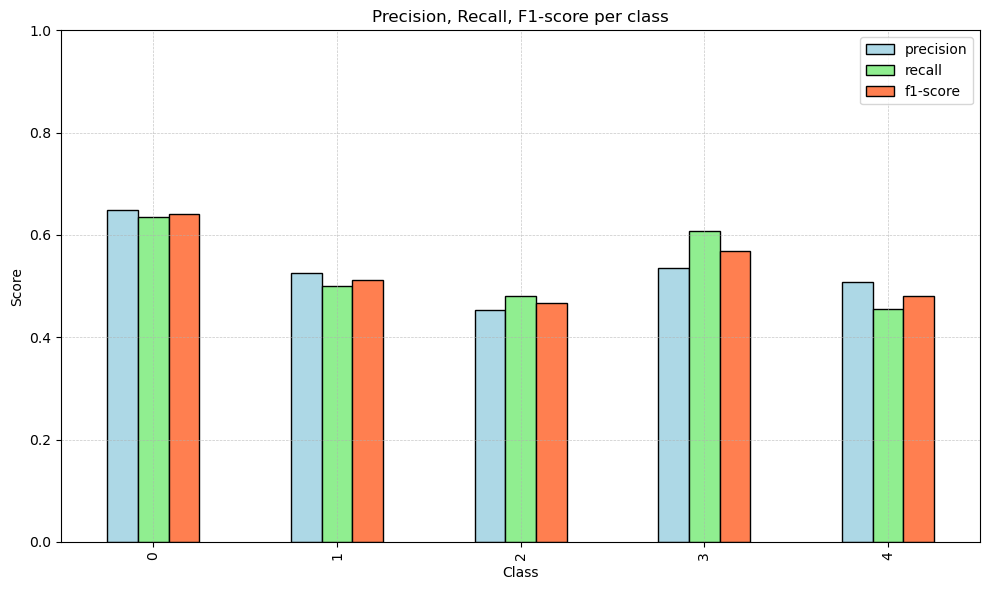

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T  
class_metrics = report_df.loc[[str(i) for i in sorted(y_test.unique())], ['precision', 'recall', 'f1-score']]

custom_colors = ['Lightblue', 'Lightgreen', 'Coral']  

class_metrics.plot(kind='bar', figsize=(10, 6), color=custom_colors, edgecolor='black')

plt.title("Precision, Recall, F1-score per class")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

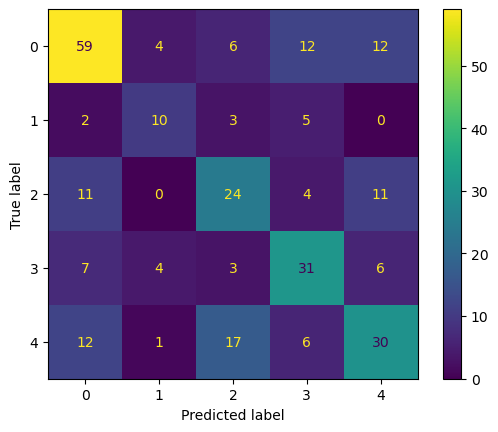

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

**Key changes**
- The tuned model’s confusion matrix is very similar to the baseline, indicating that our hyperparameter search mainly refined boundary behavior without dramatic shifts in class‐level errors.  
- Minority classes (1 and 4) continue to exhibit the lowest recall
- Class boundaries between 0, 2, and 4 remain fuzzy

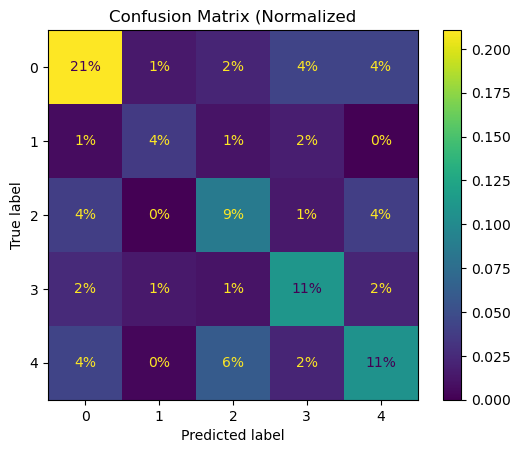

In [28]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize='all',
    values_format='.0%',
);
plt.title("Confusion Matrix (Normalized")
plt.show()

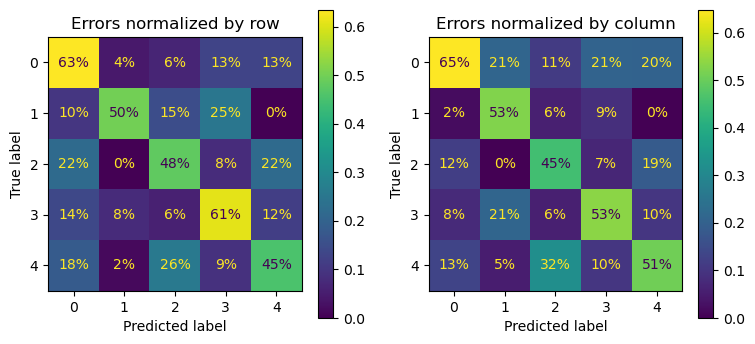

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0],normalize = "true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[1], normalize = "pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

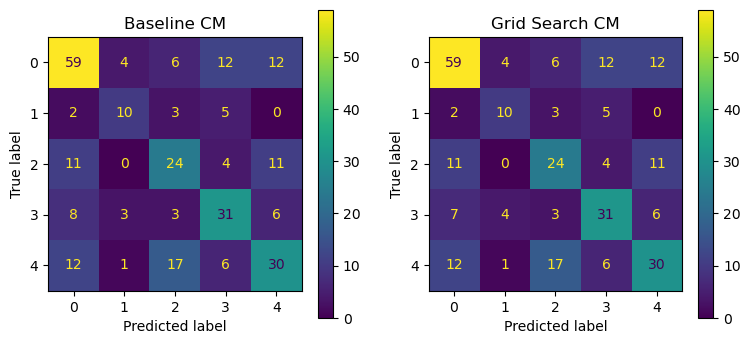

In [30]:
y_pred_2 = log_reg.predict(X_test_2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, ax=axs[0])
axs[0].set_title("Baseline CM")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[1])
axs[1].set_title("Grid Search CM")
plt.show()

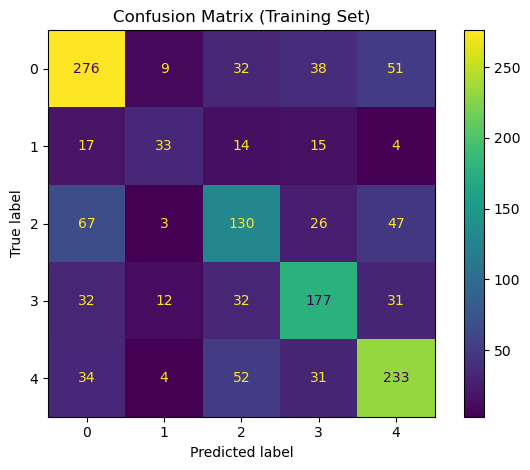

In [31]:
y_train_pred = best_log.predict(X)
disp = ConfusionMatrixDisplay.from_predictions(
    y,
    y_train_pred,
    normalize=None,     
    values_format='d',   
)

plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

> **Takeaway:** Our tuned Logistic model still underfits on several classes, especially the minority class, suggesting that even with optimal regularization it cannot capture complex class boundaries. 


### ROC & Precision–Recall Curves (One-vs-Rest)

Because our problem has **five** distinct classes, but both the ROC curve and the Precision–Recall (PR) curve are fundamentally defined for **binary** classification, we adopt a **One-vs-Rest** (OvR) strategy:
1. **Binarize the labels**  
2. **Fit the tuned classifier** 

- **Multiclass → Binary**: ROC and PR curves inherently compare “positive” vs. “negative” samples. OvR converts each class into a binary problem, allowing us to generate a separate curve per class.  
- **Per-Class Insights**: We can see how well the model distinguishes each class from all others, which is critical when classes are unbalanced or when some classes are harder to separate.  

By examining these curves for each of the five classes, we gain a nuanced understanding of our model’s ability to rank samples correctly, beyond simple accuracy or F1 scores, and particularly how it handles rare vs common classes.  


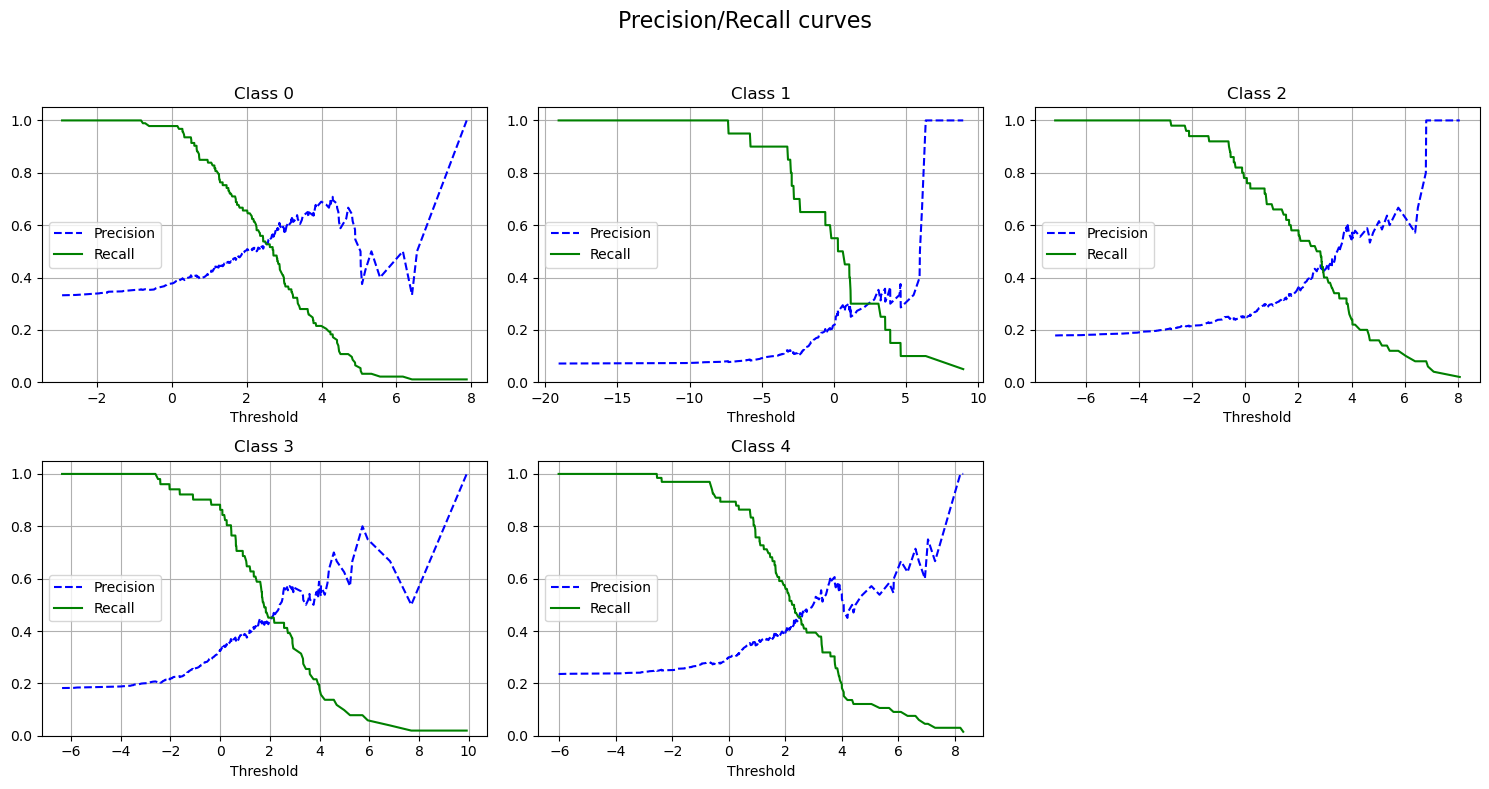

In [32]:
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_scores = cross_val_predict(best_log, X_test_2, y_test, cv=cv, method="decision_function")


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i in range(5): 
    precisions, recalls, thresholds = precision_recall_curve(y_bin[:, i], y_scores[:, i])
    
    
    axes[i].plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=1.5)
    axes[i].plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=1.5)
    axes[i].set_title(f"Class {i}")
    axes[i].set_xlabel("Threshold")
    axes[i].set_ylim([0.0, 1.05])
    axes[i].grid(True)
    axes[i].legend(loc="center left")


axes[5].axis("off") 

plt.suptitle("Precision/Recall curves", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Class-Specific Precision–Recall Curves

 #### Key Observations
- **Class 0:** recall stays very high until threshold ≈4, then drops steeply; precision only rises slowly, indicating it’s easy to capture positives but hard to eliminate false alarms.  
- **Class 1 (minority class):** recall plummets quickly, while precision only reaches 1.0 at extremely high thresholds, reflecting that few samples are truly class 1 and the model is uncertain.  
- **Class 2 & 4:** similar behaviour to class 0 but with less stable precision, suggesting moderate separation from other classes but still some overlap.  
- **Class 3:** shows the best trade-off, with precision climbing sharply around threshold 2–4 while recall remains above 0.6, indicating the model is most confident in distinguishing class 3.

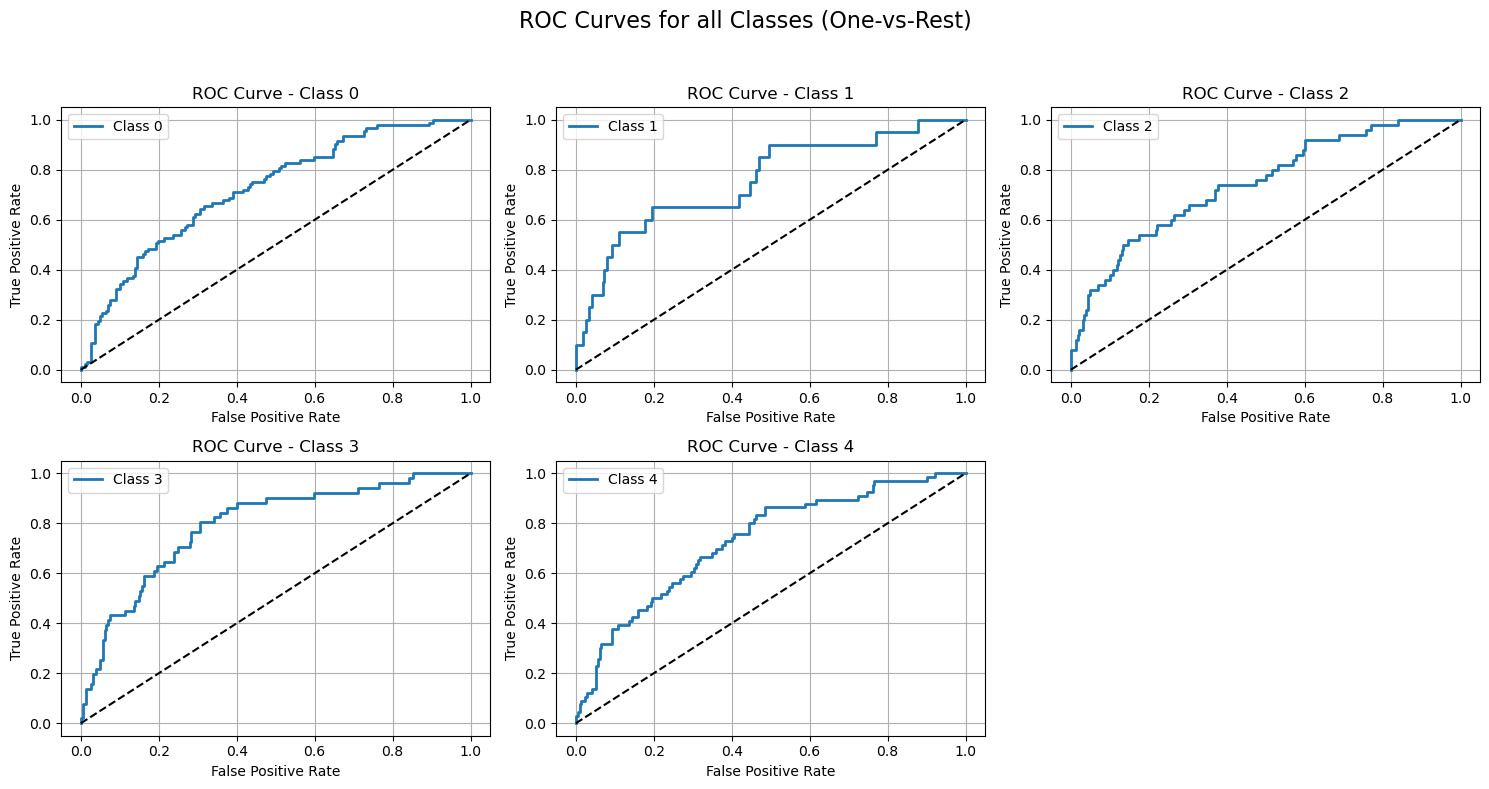

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i in range(5):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_scores[:, i])
    axes[i].plot(fpr, tpr, linewidth=2, label=f"Class {i}")
    axes[i].plot([0, 1], [0, 1], 'k--')  # baseline
    axes[i].set_title(f"ROC Curve - Class {i}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend()
    axes[i].grid(True)


axes[5].axis("off")

plt.suptitle("ROC Curves for all Classes (One-vs-Rest)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### ROC Curves for All Classes (One-vs-Rest)

#### Key Points
- **Class 3** and **Class 4** achieve the highest AUCs, indicating strong discriminative power for these labels.  
- **Class 1** (the rarest) has the lowest AUC , reflecting difficulty separating few positive examples from many negatives.  
- **Classes 0 and 2** fall in the mid-range, showing moderate separability but still room for improvement.  

> - The ROC curves confirm that the tuned Logistic model distinguishes some classes much better than others.  
> - In particular, the lower AUC for Class 1 suggests a need for targeted strategies to improve recall on rare labels.  


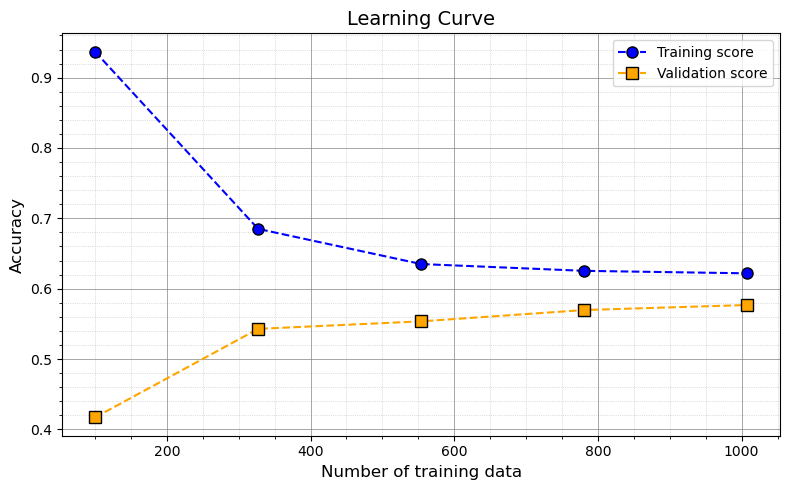

In [34]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_log, X_train, y_train,
    cv=cv,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8,5))


plt.plot(
    train_sizes,
    train_mean,
    marker='o',
    linestyle='--',
    color='blue',
    markerfacecolor='blue',
    markeredgecolor='black',
    markersize=8,
    linewidth=1.5,
    label='Training score'
)


plt.plot(
    train_sizes,
    valid_mean,
    marker='s',
    linestyle='--',
    color='orange',
    markerfacecolor='orange',
    markeredgecolor='black',
    markersize=8,
    linewidth=1.5,
    label='Validation score'
)

plt.grid(which='major', linestyle='-', linewidth=0.7, color='gray', alpha=0.7)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
plt.minorticks_on()

plt.xlabel('Number of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Learning Curve for Logistic Regression

#### Key Insights
1. **Very high initial training accuracy** (~95%) on small subsets indicates that with few points, logistic regression can perfectly (or nearly perfectly) separate the limited data it sees.  
2. As we include more data, **training accuracy gradually decreases** to around 62%, reflecting that the decision boundary must generalize over a more varied dataset rather than overfitting a tiny sample.  
3. **Validation accuracy climbs** from ~42% up to ~57% as the model sees more examples, demonstrating improved generalization with additional training data.  
4. The **gap between training and validation** narrows as sample size grows, indicating a reduction in variance without a large increase in bias.

> **Takeaway:**  
> - Additional training data helps Logistic Regression learn a more robust decision boundary, boosting validation performance while slightly lowering training fit.  
> - The remaining gap suggests some variance remains

## k-Nearest Neighbors 

We now apply the same rigorous workflow used for Logistic Regression to our **k-Nearest Neighbors** model. 

### Baseline Model

In [35]:
kNN = make_pipeline(preprocess_pipeline, KNeighborsClassifier())
kNN_scores = cross_val_score(kNN, X_train, y_train, cv=cv, scoring='accuracy')
print("kNN accuracy per fold:", kNN_scores)
print("kNN mean accuracy:", kNN_scores.mean())
print("kNN standard deviation:", kNN_scores.std())

kNN accuracy per fold: [0.6875     0.73214286 0.69642857 0.72321429 0.69642857 0.67857143
 0.6875     0.72321429 0.82142857 0.77678571]
kNN mean accuracy: 0.7223214285714286
kNN standard deviation: 0.04308903040004876


In [36]:
kNN.fit(X_train, y_train)
kNN.score(X_test_2, y_test)

0.6714285714285714

In [37]:
set_config(display='diagram')  
kNN

Pipeline(steps=[('pipeline', Pipeline(steps=[('scaler', StandardScaler())])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [38]:
y_pred = kNN.predict(X_test_2)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        93
           1       0.78      0.35      0.48        20
           2       0.54      0.66      0.59        50
           3       0.71      0.71      0.71        51
           4       0.74      0.53      0.62        66

    accuracy                           0.67       280
   macro avg       0.69      0.61      0.63       280
weighted avg       0.68      0.67      0.66       280




#### Key Observations
- **Overall accuracy = 0.67**, already substantially higher than the 0.55 achieved by Logistic Regression.  
- **Class 0 (majority)**: recall 0.83 and F1 0.75;  k-NN correctly identifies most of the “easy” majority samples.  
- **Class 1 (rarest)**: precision 0.78 but recall 0.35; model is conservative (few false positives) but misses most true class 1 samples.  
- **Class 2 & 4**: moderate performance (F1 ≈ 0.59 and 0.62), showing room for improvement in separating these classes.  
- **Class 3**: balanced precision and recall (0.71), indicating solid discrimination for this label.

> **Takeaway:**  
> Even without tuning, k-NN outperforms the baseline Logistic Regression, particularly on the majority class. However, it still struggles with the rarest class (class 1) and shows uneven performance across classes 2 and 4, motivating our subsequent grid search to optimize `k`, weighting, and distance metric for a better F1 balance.  


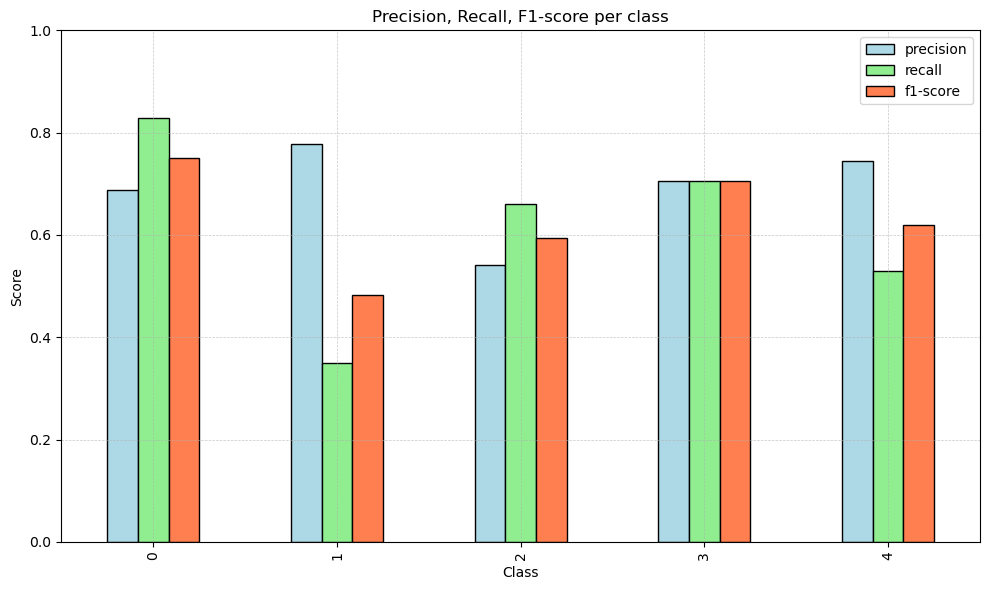

In [39]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T  
class_metrics = report_df.loc[[str(i) for i in sorted(y_test.unique())], ['precision', 'recall', 'f1-score']]

custom_colors = ['Lightblue', 'Lightgreen', 'Coral']  

class_metrics.plot(kind='bar', figsize=(10, 6), color=custom_colors, edgecolor='black')

plt.title("Precision, Recall, F1-score per class")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

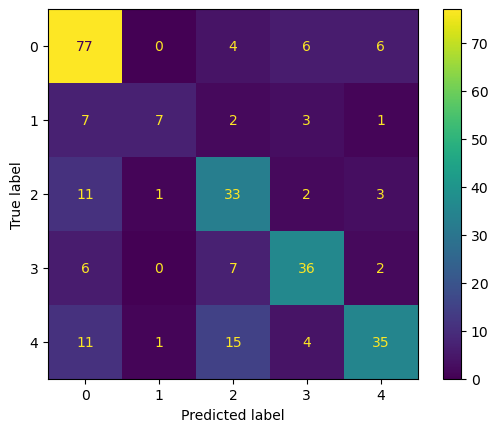

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

> **Insight (Pre-Tuning):**  
> Even before hyperparameter optimization, k-NN exhibits strong performance on most classes except the rarest (class 1). This sets a high benchmark for our subsequent grid search to improve minority-class recall and overall F1.  

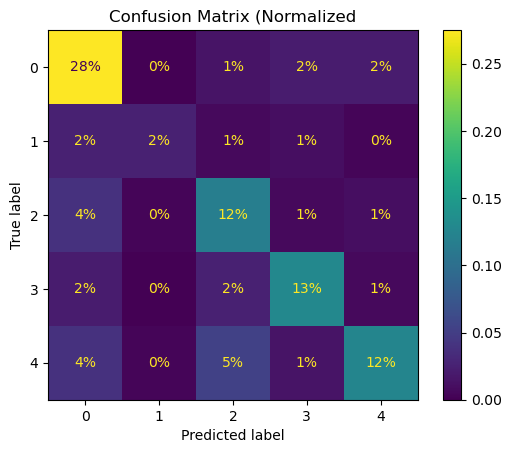

In [41]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize='all',
    values_format='.0%',
)
plt.title("Confusion Matrix (Normalized")
plt.show()

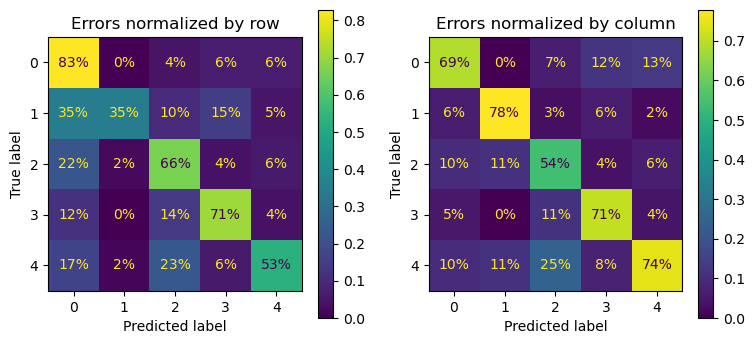

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0],normalize = "true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[1], normalize = "pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

### Hyperparameter Tuning Strategy for k-Nearest Neighbors

#### Hyperparameter Grid
- **`n_neighbors`**: Number of neighbors to consider: `[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]`  
- **`weights`**: How to weight neighbor votes: `['uniform', 'distance']`  
- **`metric`**: Distance metric: `['euclidean', 'manhattan', 'minkowski']`

####  Scoring & Refit
- We record the same four metrics in CV:  
  - `accuracy`  
  - `precision_weighted`  
  - `recall_weighted`  
  - `f1_weighted`  
- We set `refit='f1_weighted'` so that, once all combinations are evaluated, **GridSearchCV** retrains the final k-NN on the training set using the hyperparameters that maximize **weighted F1**.

This procedure guarantees we select the optimal combination of k, weights, and distance metric that best balances bias and variance **while preserving fair performance across every class**.  

In [43]:
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall_weighted': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=0)
}

grid_search = GridSearchCV(kNN, param_grid, cv=cv, scoring=scoring, refit='f1_weighted');
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_
index = grid_search.best_index_

params = grid_search.best_params_
print(params)

true_params = {
    k.split('__')[1]: v
    for k, v in params.items()
    if k.startswith('kneighborsclassifier__')
}

best_knn_model = KNeighborsClassifier(**true_params)
best_knn = make_pipeline(preprocess_pipeline, best_knn_model)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test_2)

print(classification_report(y_test, y_pred))

{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        93
           1       0.88      0.35      0.50        20
           2       0.58      0.66      0.62        50
           3       0.69      0.82      0.75        51
           4       0.73      0.65      0.69        66

    accuracy                           0.71       280
   macro avg       0.73      0.66      0.67       280
weighted avg       0.73      0.71      0.71       280




**Key observations:**

- **Overall accuracy = 0.71**, up from ~0.67 pre-tuning, confirming meaningful gains.  
- **Weighted F1 = 0.71** and **macro F1 = 0.67**, showing balanced improvement across classes.  

> **Takeaway:**  
> Hyperparameter tuning yields a solid overall boost, particularly raising F1 for classes 2–4. However, class 1 remains challenging.


In [44]:
best_idx = grid_search.best_index_

n_folds = cv.get_n_splits()

fold_acc = np.array([
    results[f'split{i}_test_accuracy'][best_idx]
    for i in range(n_folds)
])

print("kNN accuracy per fold:", fold_acc)
print("kNN mean accuracy:", fold_acc.mean())
print("kNN standard deviation:", fold_acc.std())



kNN accuracy per fold: [0.75892857 0.78571429 0.78571429 0.73214286 0.76785714 0.70535714
 0.74107143 0.77678571 0.8125     0.75892857]
kNN mean accuracy: 0.7625
kNN standard deviation: 0.029124118625535867


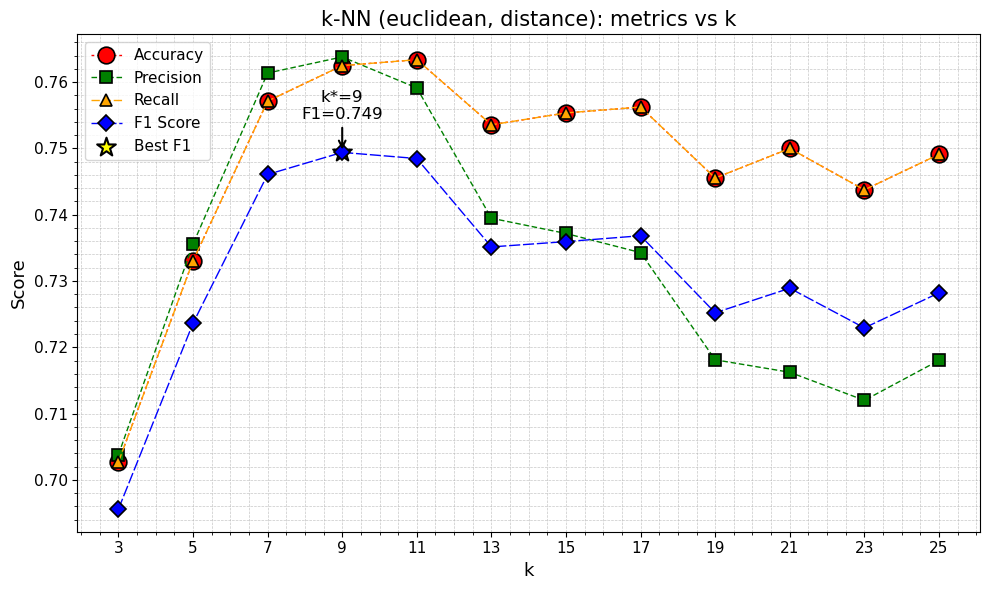

In [45]:
df_knn = pd.DataFrame(results)

df_euc = df_knn[
    (df_knn['param_kneighborsclassifier__metric'] == 'euclidean') &
    (df_knn['param_kneighborsclassifier__weights'] == 'distance')
]

ks = df_euc['param_kneighborsclassifier__n_neighbors'].astype(int)

metrics = {
    'Accuracy':    'mean_test_accuracy',
    'Precision':   'mean_test_precision_weighted',
    'Recall':      'mean_test_recall_weighted',
    'F1 Score':    'mean_test_f1_weighted'
}


markers = {
    'Accuracy':  'o',
    'Precision': 's',
    'Recall':    '^',
    'F1 Score':  'D'
}
colors = {
    'Accuracy':  'red',
    'Precision': 'green',
    'Recall':    'orange',
    'F1 Score':  'blue'
}
dash_patterns = {
    'Accuracy':  (2, 2),
    'Precision': (4, 2),
    'Recall':    (6, 2),
    'F1 Score':  (8, 2)
}
sizes = {
    'Accuracy':  120,   
    'Precision': 80,
    'Recall':    80,
    'F1 Score':  80
}

plt.figure(figsize=(10, 6))
for label, col in metrics.items():
    plt.plot(
        ks,
        df_euc[col],
        marker=markers[label],
        linestyle='--',
        linewidth=1,
        markersize=sizes[label] / 10,    
        dashes=dash_patterns[label],
        label=label,
        color=colors[label],
        markeredgecolor='black',         
        markeredgewidth=1.2
    )


best_idx = df_euc['mean_test_f1_weighted'].idxmax()
best_k = df_euc.loc[best_idx, 'param_kneighborsclassifier__n_neighbors']
best_f1 = df_euc.loc[best_idx, 'mean_test_f1_weighted']
plt.scatter(
    best_k, best_f1,
    s=200,
    marker='*',
    c='yellow',
    edgecolors='black',
    linewidths=1.5,
    label='Best F1'
)
plt.annotate(
    f'k*={best_k}\nF1={best_f1:.3f}',
    xy=(best_k, best_f1),
    xytext=(best_k, best_f1 + 0.005),
    ha='center',
    fontsize=12,
    arrowprops=dict(arrowstyle='->', lw=1.5)
)

plt.xticks(ks, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('k', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('k-NN (euclidean, distance): metrics vs k', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.tight_layout()
plt.legend(fontsize=11, loc='best')
plt.show()

### k-NN (Euclidean, Distance)  Metrics vs Number of Neighbors (k)

This plot displays how **Accuracy**, **Precision (weighted)**, **Recall (weighted)**, and **F1 score (weighted)** vary as we change the number of neighbors k  in our tuned k-NN model (using Euclidean distance and distance-based weighting):

#### Key Takeaways
1. **Rapid increase** in all metrics from k=3 to k=9\, indicating that too few neighbors underfits on noisy fluctuations.  
2. **Peak performance** at k=9:  
   - **F1** is highest (0.749), balancing precision and recall.  
   - **Precision** and **Recall** also reach their maxima (~0.76).  
   - **Accuracy** peaks around 0.76.  
3. **Gradual decline** in F1 and Precision beyond k=9 as the model becomes overly smooth (higher bias). Recall remains relatively stable until k=17, then dips as well.  
4. **Trade-off visualization:** by plotting all four metrics together, we confirm that optimizing for F1 at k=9 preserves strong accuracy, precision, and recall simultaneously.

> **Conclusion:** We select **k = 9** (with distance weighting and Euclidean metric) as our final k-NN configuration, since it provides the best overall balance of metrics on cross-validation.  


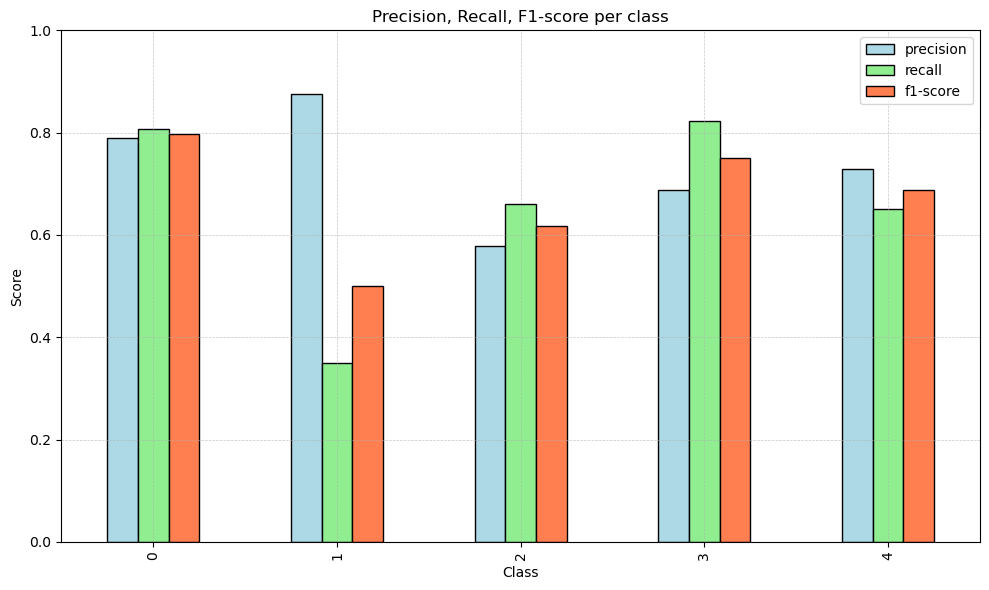

In [46]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T  
class_metrics = report_df.loc[[str(i) for i in sorted(y_test.unique())], ['precision', 'recall', 'f1-score']]

custom_colors = ['Lightblue', 'Lightgreen', 'Coral']  

class_metrics.plot(kind='bar', figsize=(10, 6), color=custom_colors, edgecolor='black')

plt.title("Precision, Recall, F1-score per class")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

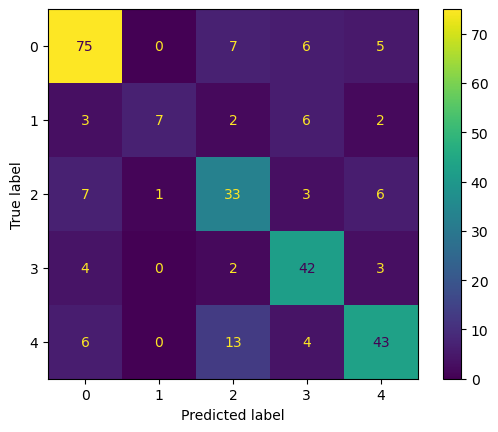

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

####  Confusion Matrix for Tuned k-NN Model (Test Set)
> **Takeaway:**  
Hyperparameter tuning (k=9, distance weighting, Euclidean metric) sharpens class boundaries, especially boosting recall on classes 3 and 4, and reduces harmful confusions (notably eliminating Class 0→1 errors). Class 1 remains challenging.


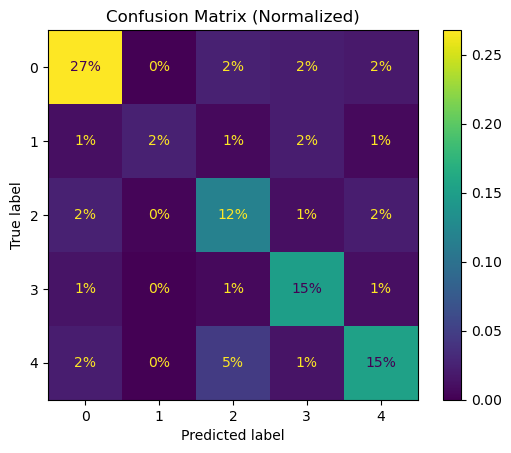

In [48]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize='all',
    values_format='.0%',
)
plt.title("Confusion Matrix (Normalized)")
plt.show()


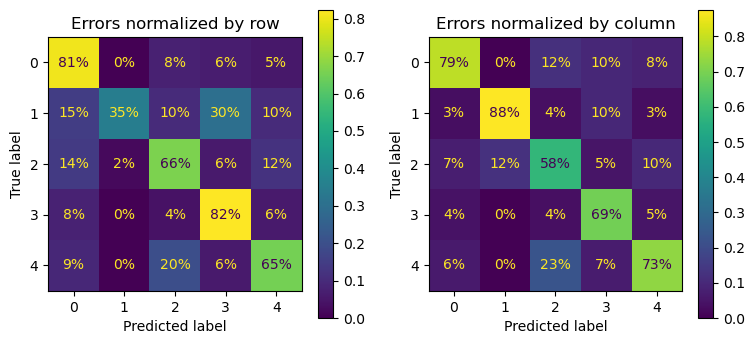

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0],normalize = "true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[1], normalize = "pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

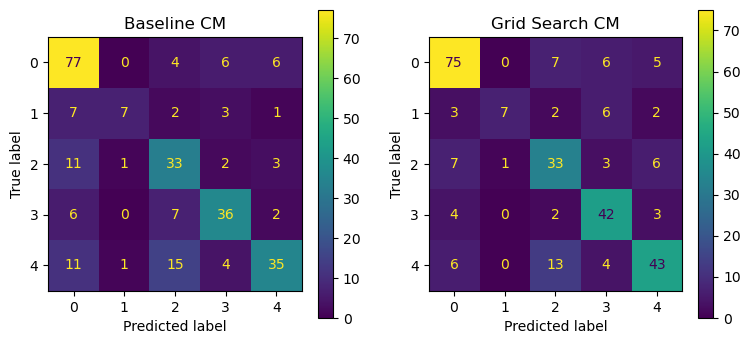

In [50]:
y_pred_2 = kNN.predict(X_test_2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, ax=axs[0])
axs[0].set_title("Baseline CM")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[1])
axs[1].set_title("Grid Search CM")
plt.show()

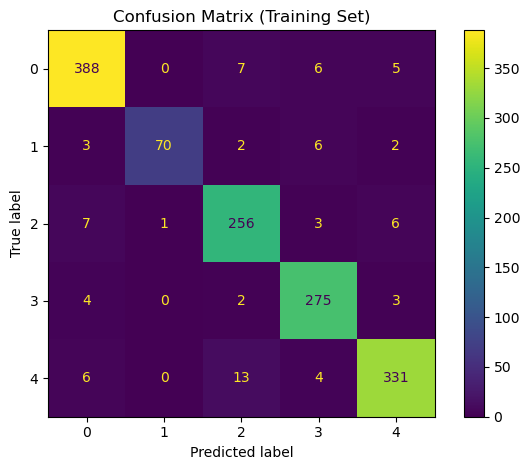

In [51]:
y_train_pred = best_knn.predict(X)
disp = ConfusionMatrixDisplay.from_predictions(
    y,
    y_train_pred,
    normalize=None,     
    values_format='d',   
)

plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


**Why this happens with k-NN?**
- **“Memorization” effect:** Each training sample’s nearest neighbors include itself, so k-NN classifies most of points correctly on the data it has seen.  
- **No generalization insight:** While this looks ideal, it reflects **low training error** rather than true predictive power. The real test of generalization is performance on unseen data.  

> **Key reminder:** A quite perfect training confusion matrix is expected for k-NN, but it does **not** guarantee equally strong performance on new samples.


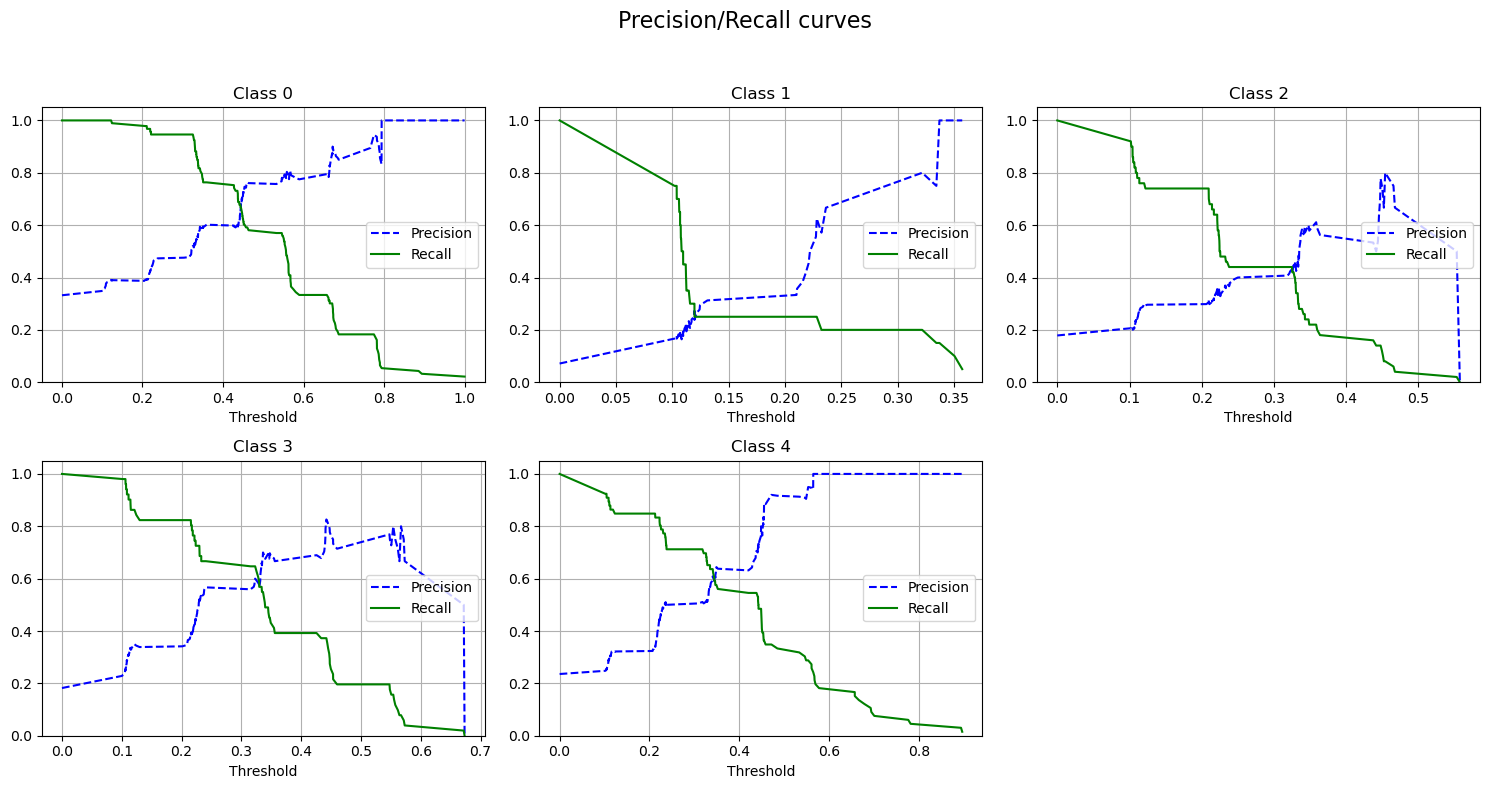

In [52]:
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_scores = cross_val_predict(best_knn, X_test_2, y_test, cv=cv, method="predict_proba")


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i in range(5):  
    precisions, recalls, thresholds = precision_recall_curve(y_bin[:, i], y_scores[:, i])
    
    axes[i].plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=1.5)
    axes[i].plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=1.5)
    axes[i].set_title(f"Class {i}")
    axes[i].set_xlabel("Threshold")
    axes[i].set_ylim([0.0, 1.05])
    axes[i].grid(True)
    axes[i].legend(loc="center right")


axes[5].axis("off") 

plt.suptitle("Precision/Recall curves", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### Class-Specific Precision–Recall Curves for Tuned k-NN

- **Class 0 (majority):**  
  - Recall stays very high until threshold ≈0.5, then drops steeply: k-NN confidently captures most true class-0 instances.  
  - Precision only gradually increases, reflecting some false positives even at low thresholds.

- **Class 1 (rarest):**  
  - Recall falls off quickly, indicating that very few samples meet even low-probability thresholds.  
  - Precision only reaches 1.0 at extreme thresholds, showing that the model is conservative and only predicts class 1 when highly certain.

- **Class 2 & 4:**  
  - Both show moderate behavior: recall declines steadily, while precision climbs as threshold increases, indicating partial overlap with other classes.

- **Class 3:**  
  - Exhibits the best balance: precision rises sharply around threshold ≈0.4, while recall remains above 0.6, highlighting that k-NN separates class 3 most cleanly.

> **Takeaway:**  
> - The steep drop in recall for class 1 suggestsit remains the hardest to identify, pointing toward potential oversampling or threshold adjustment as next steps.  


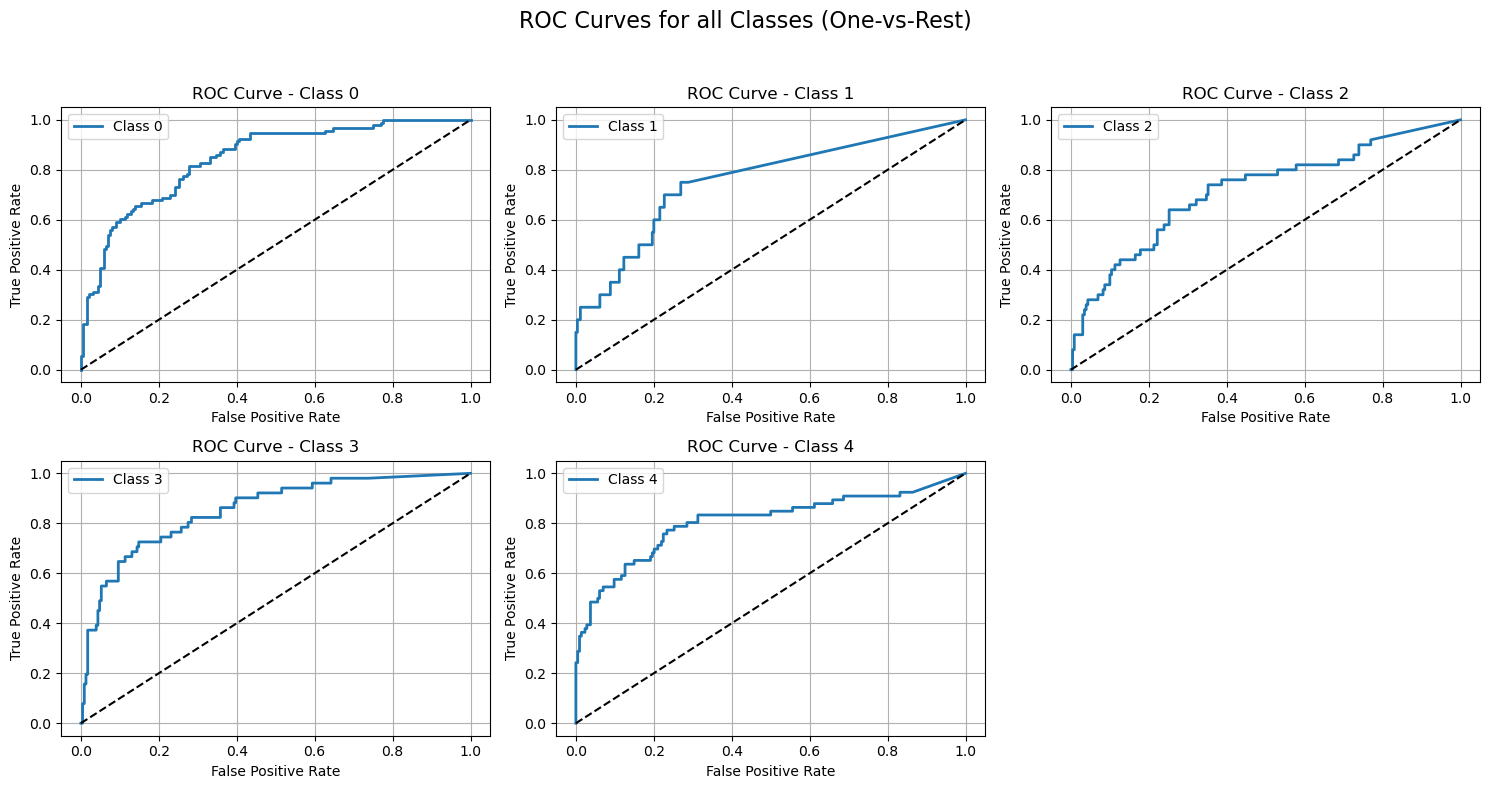

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i in range(5):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_scores[:, i])
    axes[i].plot(fpr, tpr, linewidth=2, label=f"Class {i}")
    axes[i].plot([0, 1], [0, 1], 'k--')  # baseline
    axes[i].set_title(f"ROC Curve - Class {i}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend()
    axes[i].grid(True)


axes[5].axis("off")

plt.suptitle("ROC Curves for all Classes (One-vs-Rest)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### ROC Curves for Tuned k-NN Model (One-vs-Rest)

#### Key Insights
- **Class 3 & Class 4** achieve the highest separability (steeper curves closer to the top-left), with estimated AUCs ≈ 0.85–0.90.  
- **Class 0 & Class 2** show strong performance (AUC ≈ 0.80), indicating good(but not perfect)distinction from other classes.  
- **Class 1 (rarest)** has the shallowest curve (AUC ≈ 0.75), reflecting difficulty in distinguishing few positives against many negatives.  

> **Takeaway:**  
> - These ROC curves confirm that our tuned k-NN model reliably separates most classes, especially 3 and 4, while Class 1 remains the most challenging. 

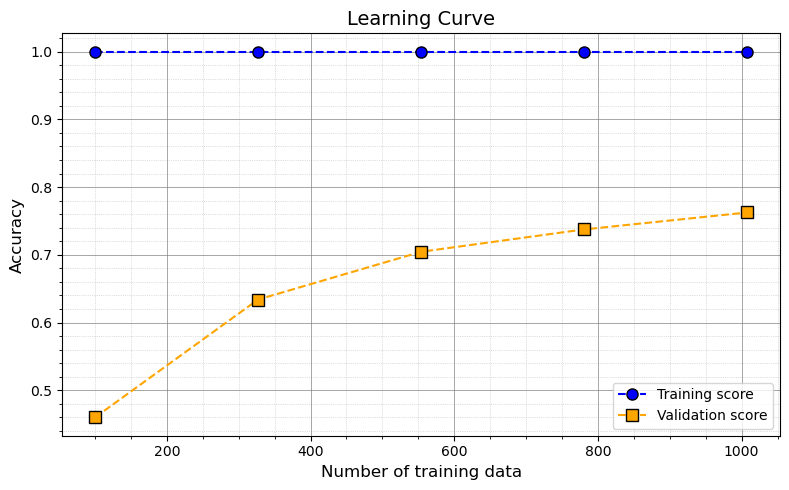

In [54]:
train_sizes, train_scores, valid_scores = learning_curve(
    best_knn, X_train, y_train,
    cv=cv,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=1,
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8,5))


plt.plot(
    train_sizes,
    train_mean,
    marker='o',
    linestyle='--',
    color='blue',
    markerfacecolor='blue',
    markeredgecolor='black',
    markersize=8,
    linewidth=1.5,
    label='Training score'
)

plt.plot(
    train_sizes,
    valid_mean,
    marker='s',
    linestyle='--',
    color='orange',
    markerfacecolor='orange',
    markeredgecolor='black',
    markersize=8,
    linewidth=1.5,
    label='Validation score'
)


plt.grid(which='major', linestyle='-', linewidth=0.7, color='gray', alpha=0.7)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
plt.minorticks_on()

plt.xlabel('Number of training data', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curve', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.show()



### Learning Curve for k-Nearest Neighbors

1. **Perfect training accuracy (1.0)** across all sample sizes: k-NN “memorizes” its training set, meaning that all points finds itself among its own nearest neighbors.

2. **Steady rise in validation accuracy** from ~0.46 to ~0.76  
   - With few training points, generalization is poor, while adding more data greatly improves performance.

3. **Large initial gap** between training and validation that **narrows** as data grows  
   - High variance, so over-fitting, at small sample sizes  
   - More data reduces variance, though a gap remains, indicating some irreducible noise or model bias.

> **Implication:**  
> - k-NN benefits substantially from more training examples: each additional chunk of data boosts validation accuracy.  


## Final Conclusions

After a systematic comparison of **Logistic Regression** and **k-Nearest Neighbors (k-NN)** on our 5-class unbalanced dataset (1400 samples and 30 features), we select **k-NN** as the final model because of:

1. **Overall Performance**  
   - k-NN (k = 9, distance weighting, Euclidean metric) achieves markedly higher accuracy and weighted F1 than Logistic Regression, both on the hold-out test set and in cross-validation.

2. **Per-Class Breakdown**  
   - **Class 0 (majority)**: k-NN recall ≈ 0.81 vs LR’s 0.63, showing strong mastery of the most frequent label.  
   - **Class 1 (rarest)**: LR recall ≈ 0.50 vs. k-NN’s 0.35, indicating LR is slightly better at capturing very few instances, but k-NN still delivers higher overall F1.  
   - **Classes 2–4 (mid-frequency)**: k-NN boosts recall and precision for these classes by 10–15 percentage points versus LR, as seen in per-class F1 improvements

3. **Bias–Variance & Learning Behavior**  
   - k-NN’s learning curve shows perfect training accuracy (due to self-matching) and steadily rising validation accuracy up to ~ 0.76, indicating that more data reduces variance.  
   - Logistic Regression plateaus at a lower validation accuracy (~ 0.57), reflecting its linear boundaries.

4. **Ranking & Threshold Analysis**  
   - In One-vs-Rest ROC and Precision–Recall analyses, k-NN yields higher AUCs for classes 2–4 and competitive performance on class 0, confirming better ranking of positive instances.  
   - Class 1 remains the hardest for both models, suggesting future oversampling or class-specific threshold tuning.

5. **Class Imbalance Handling**  
   - We used **weighted F1** in all GridSearchCV steps to ensure minority classes influenced hyperparameter selection.  
   - We examined per-class metrics and confusion matrices before and after tuning to verify improvements


**Final Model Selection:**  
> **k-Nearest Neighbors** (k = 9, weights=`“distance”`, metric=`“euclidean”`)



In [55]:
X_test = pd.read_csv("mldata_0003198640.TEST_FEATURES.csv",index_col=0)
X_test.shape

(1400, 30)

In [56]:
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
id,,,,,,,,,,,,,,,,,,,,,
0,-0.982388,-0.280398,5.295164,-2.974703,-0.427456,0.738751,3.278519,1.385533,1.510182,1.788026,...,0.132104,1.331306,2.343204,2.021888,1.134657,0.821491,-3.819364,5.284624,5.829079,1.908236
1,1.032702,4.578991,-2.450730,3.873494,-1.008232,-2.362608,-0.897655,1.254403,0.331238,-1.155770,...,0.468937,0.778530,-0.160912,-0.645478,-2.654330,-0.155755,-2.041252,-1.560777,-11.931705,4.264065
2,-4.203985,-0.935911,8.191100,-4.693977,-0.214268,3.914029,-4.235270,-5.754510,3.771224,0.234119,...,0.054111,0.561957,-0.253010,0.295136,1.401895,0.011395,1.965727,-0.131502,12.446515,-11.629462
3,0.307614,-0.397959,2.728017,0.915180,-0.050158,3.111877,0.994607,-1.767268,0.452130,-0.349228,...,0.740865,0.756628,-0.536555,-1.213838,-3.905234,0.020623,2.566053,-1.162025,8.479572,-3.958040
4,-5.071132,3.913186,-0.958844,0.109939,2.132520,5.239474,1.038822,-2.592752,6.422709,-0.016214,...,1.348014,-0.471889,0.057429,-2.761165,-0.109390,0.878463,6.249958,-1.961508,2.259787,-13.718476


In [57]:
print(X_test.isnull().sum()) #check for missing values

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64


In [58]:
model_chosen = best_knn
model_chosen.fit (X_train, y_train)
y_test_pred = model_chosen.predict(X_test)

In [59]:
import os
np.savetxt("predictions.txt", y_test_pred, fmt='%d')